In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
# Setting the random seed for the train, test, split
np.random.seed(42)
import acquire
import prepare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20394 non-null  int64  
 1   parcelid                      20394 non-null  int64  
 2   airconditioningtypeid         6512 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  11 non-null     float64
 5   bathroomcnt                   20394 non-null  float64
 6   bedroomcnt                    20394 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         12641 non-null  float64
 9   calculatedbathnbr             20310 non-null  float64
 10  decktypeid                    175 non-null    float64
 11  finishedfloor1squarefeet      1673 non-null   float64
 12  calculatedfinishedsquarefeet  20341 non-null  float64
 13  f

<h1> Acquire </h1>

In [2]:
# I am loading my acquired data into a data frame called acquired. This is my raw data before I prepared it.
acquired= acquire.get_zillow_data()

In [3]:
# Getting a concise summary of the dataframe.
acquired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    20394 non-null  int64  
 1   id                            20394 non-null  int64  
 2   parcelid                      20394 non-null  int64  
 3   airconditioningtypeid         6512 non-null   float64
 4   architecturalstyletypeid      49 non-null     float64
 5   basementsqft                  11 non-null     float64
 6   bathroomcnt                   20394 non-null  float64
 7   bedroomcnt                    20394 non-null  float64
 8   buildingclasstypeid           0 non-null      float64
 9   buildingqualitytypeid         12641 non-null  float64
 10  calculatedbathnbr             20310 non-null  float64
 11  decktypeid                    175 non-null    float64
 12  finishedfloor1squarefeet      1673 non-null   float64
 13  c

In [4]:
# Viewing some basic statistical details such as percentile, mean, std etc. of the numerical values in a data frame
acquired.describe()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,heatingorsystemtypeid.1,propertylandusetypeid.1,id.1,parcelid.1,logerror,buildingclasstypeid.1,buildingclassdesc,storytypeid.1,typeconstructiontypeid.1,parcelid.2
count,"20,394.00","20,394.00","20,394.00","6,512.00",49.00,11.00,"20,394.00","20,394.00",0.00,"12,641.00",...,"13,096.00","20,394.00","20,394.00","20,394.00","20,394.00",0.00,0.00,11.00,51.00,"20,394.00"
mean,"10,196.50","1,510,218.13","13,065,486.51",1.91,7.35,761.45,2.28,3.02,nan,6.61,...,3.92,262.31,"42,488.76","13,065,486.51",0.01,nan,nan,7.00,6.04,"13,065,486.51"
std,"5,887.39","859,845.71","3,502,608.27",3.13,3.11,444.82,0.96,1.03,nan,1.69,...,3.60,2.22,"6,472.88","3,502,608.27",0.17,nan,nan,0.00,0.63,"3,502,608.27"
min,0.00,349.00,"10,712,101.00",1.00,2.00,280.00,0.00,0.00,nan,1.00,...,1.00,260.00,"1,248.00","10,712,101.00",-4.45,nan,nan,7.00,4.00,"10,712,101.00"
25%,"5,098.25","774,455.75","11,539,960.25",1.00,7.00,497.00,2.00,2.00,nan,6.00,...,2.00,261.00,"37,030.25","11,539,960.25",-0.03,nan,nan,7.00,6.00,"11,539,960.25"
50%,"10,196.50","1,525,712.00","12,587,360.50",1.00,7.00,640.00,2.00,3.00,nan,7.00,...,2.00,261.00,"42,539.50","12,587,360.50",0.00,nan,nan,7.00,6.00,"12,587,360.50"
75%,"15,294.75","2,252,888.75","14,272,879.75",1.00,7.00,865.50,3.00,4.00,nan,8.00,...,7.00,266.00,"48,032.75","14,272,879.75",0.04,nan,nan,7.00,6.00,"14,272,879.75"
max,"20,393.00","2,982,274.00","167,687,839.00",13.00,21.00,"1,809.00",11.00,12.00,nan,12.00,...,24.00,275.00,"53,513.00","167,687,839.00",3.18,nan,nan,7.00,10.00,"167,687,839.00"


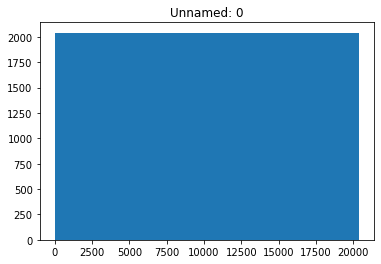

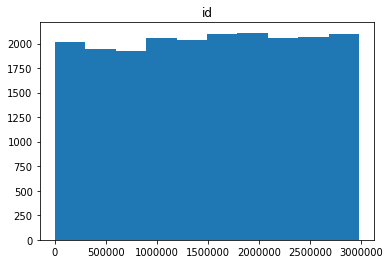

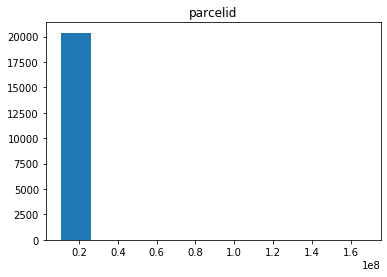

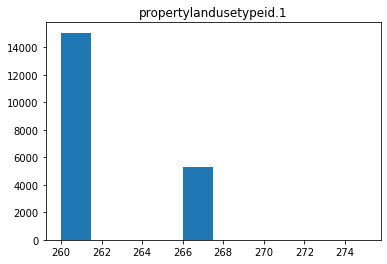

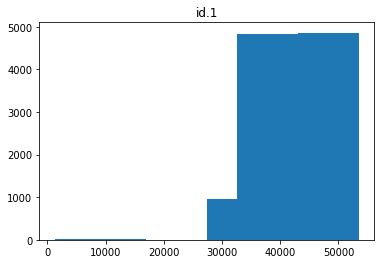

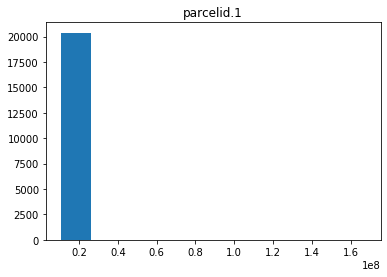

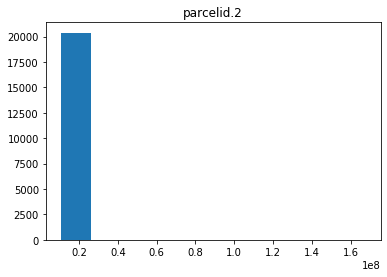

In [5]:
# Distribution of my numerical columns
num_cols = acquired.columns[[acquired[col].dtype == 'int64' for col in acquired.columns]]
for col in num_cols:
    plt.hist(acquired[col])
    plt.title(col)
    plt.show()

<h1> Prepare </h1>

In [6]:
# importing my cleaned data
df= prepare.clean_zillow()
# showing my clean data information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 0 to 20393
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20394 non-null  int64  
 1   parcelid                      20394 non-null  int64  
 2   bathroomcnt                   20394 non-null  float64
 3   bedroomcnt                    20394 non-null  float64
 4   calculatedfinishedsquarefeet  20341 non-null  float64
 5   finishedsquarefeet12          20282 non-null  float64
 6   fullbathcnt                   20310 non-null  float64
 7   lotsizesquarefeet             18131 non-null  float64
 8   rawcensustractandblock        20394 non-null  float64
 9   regionidcity                  20028 non-null  float64
 10  regionidzip                   20380 non-null  float64
 11  structuretaxvaluedollarcnt    20361 non-null  float64
 12  taxvaluedollarcnt             20394 non-null  float64
 13  l

In [7]:
df.calculatedfinishedsquarefeet

0                   1,458.00
1                   1,421.00
2                   2,541.00
3                   1,650.00
4                     693.00
                ...         
20389               1,556.00
20390               1,586.00
20391               1,319.00
20392               2,748.00
20393               1,788.00
Name: calculatedfinishedsquarefeet, Length: 20394, dtype: float64

In [11]:
#Describing my object columns
# describe object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))

2017-06-30    1092
2017-05-31     796
2017-05-26     683
2017-06-16     668
2017-06-23     656
              ... 
2017-06-24       3
2017-05-13       2
2017-05-06       2
2017-06-03       1
2017-05-20       1
Name: transactiondate, Length: 63, dtype: int64
2017-06-30                   0.05
2017-05-31                   0.04
2017-05-26                   0.03
2017-06-16                   0.03
2017-06-23                   0.03
                     ...         
2017-06-24                   0.00
2017-05-13                   0.00
2017-05-06                   0.00
2017-06-03                   0.00
2017-05-20                   0.00
Name: transactiondate, Length: 63, dtype: float64


In [12]:
#import test, train, validate from prepare
train, validate, test = prepare.prep_zillow_data()

<h1>Exploration</h1>

'$$H0$$:' There is no correlation between log error and tax amount.<br><br>
'$$Ha$$:' There is a correlation between log error and tax amount.

In [10]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

<h1>Modeling </h1>

<h1> Conclusion </h1>